### Import the data 

In [1]:
# let us import the necessary modules required to deal with the data and its analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# we need to import the data.
housing=pd.read_csv('housing.csv')

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#let us gain some information about the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


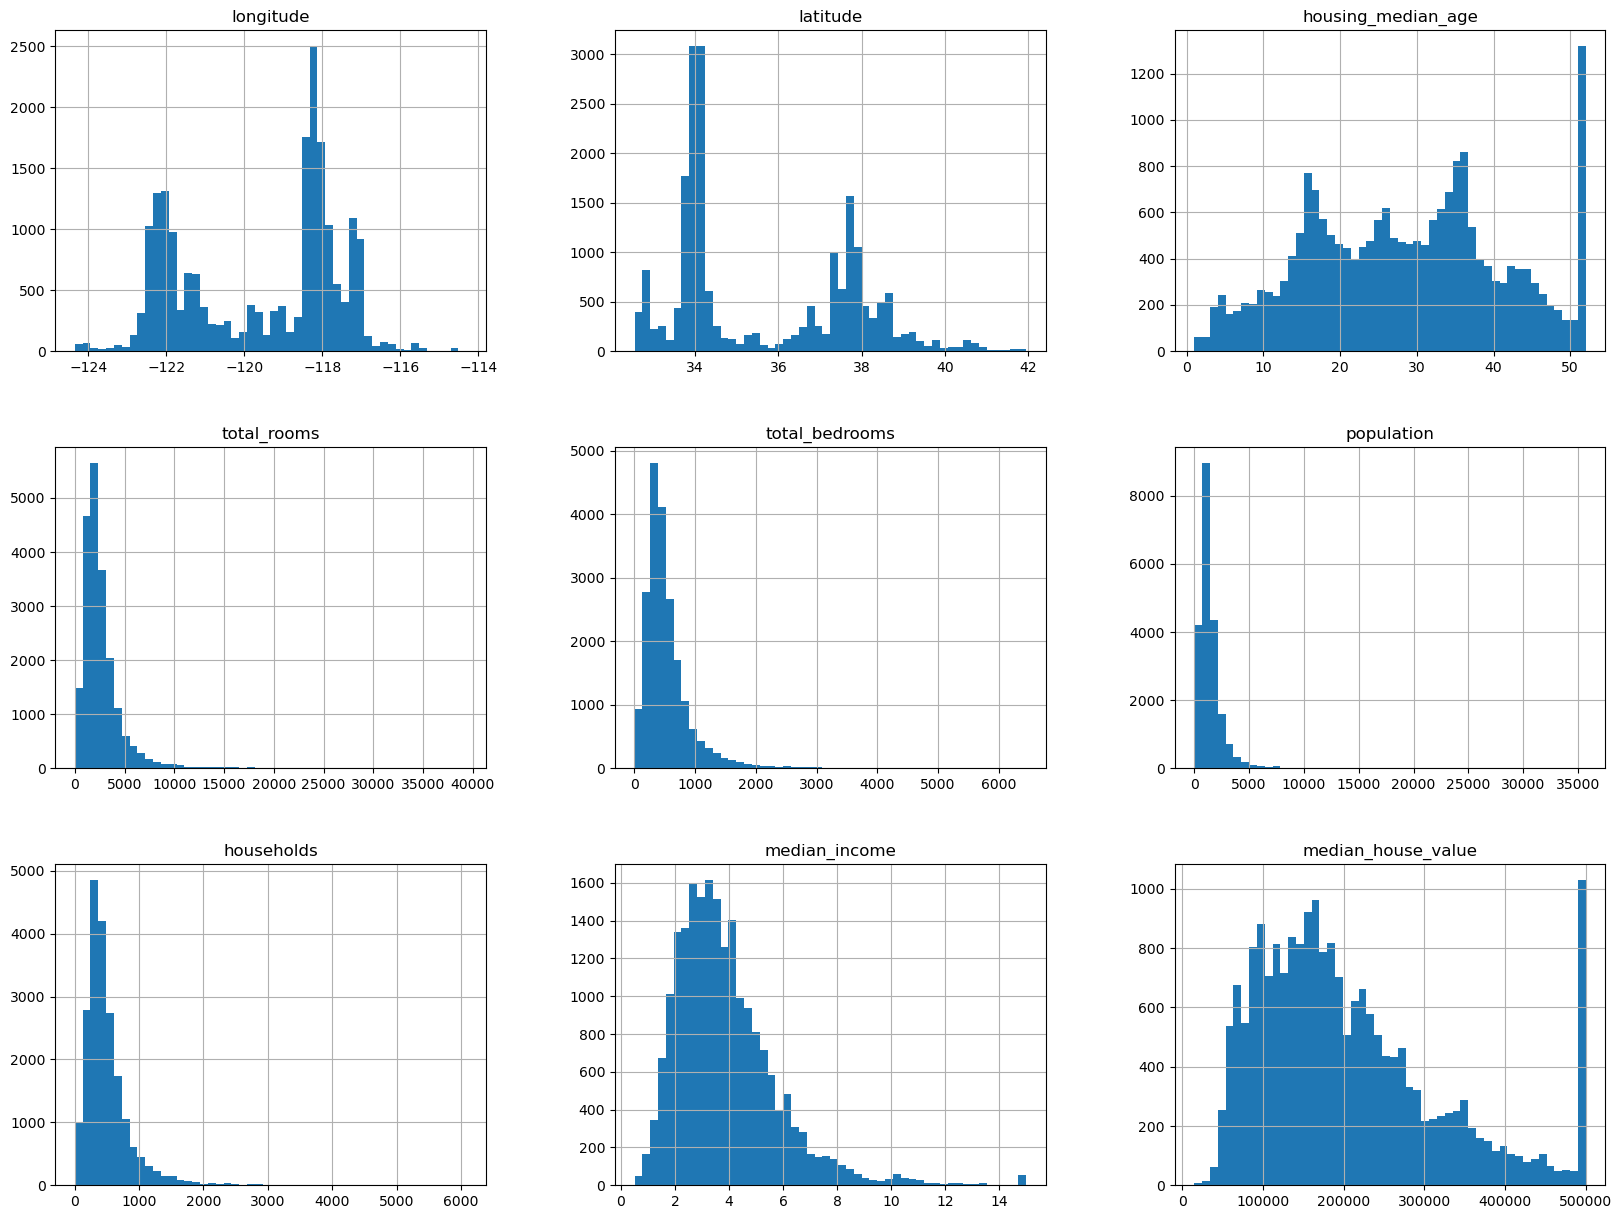

In [5]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Test Set

**To check whether the model is learned well in the training data we use the test data**

In [6]:
#let us create the testset
housing_test_val=int(len(housing)*0.2)
test_data=housing[:housing_test_val]
train_data=housing[housing_test_val:]

In [7]:
len(test_data),len(train_data)

(4128, 16512)

In [8]:
#there is an another simple way to split the data that is.
from sklearn.model_selection import train_test_split

#before splitting we need to remove the label attribute 
x=housing.drop('median_house_value',axis=1)
y=housing['median_house_value']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND


In [10]:
y_train.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

<AxesSubplot:>

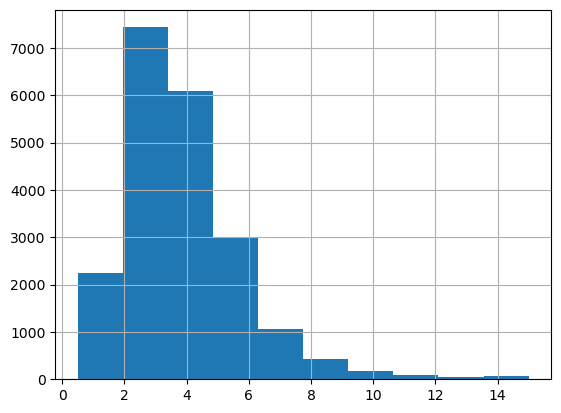

In [11]:
housing['median_income'].hist()

**thus the given sample contain the data more on one place like a catogory attribute lets split it unbaised**

<AxesSubplot:>

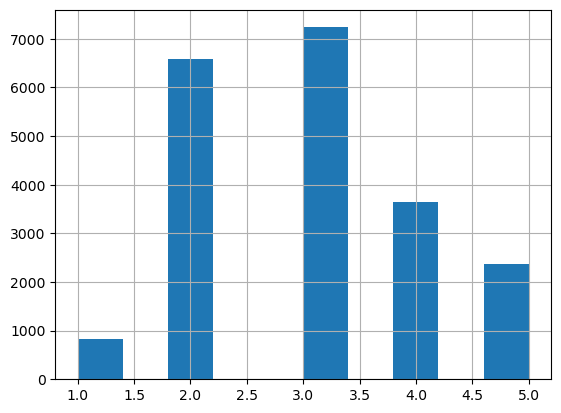

In [12]:
housing['income_catagory']=pd.cut(housing['median_income'],
                                 bins=[0.,1.5,3.0,4.5,6.,np.inf],
                                  labels=[1,2,3,4,5]
                                 )
housing['income_catagory'].hist()

In [13]:
#let us split them in stratified samples
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for(train_set,test_set) in split.split(housing,housing['income_catagory']):
    strat_train_set=housing.loc[train_set]
    strat_test_set=housing.loc[test_set]

In [14]:
len(strat_train_set)

16512

In [15]:
#Now we must remove the income_cat from the data set hence it is not required after splitting the data.
for i in (strat_train_set,strat_test_set):
    i.drop('income_catagory',inplace=True,axis=1)

In [16]:
# now we need to only use with the strat_train_split so change the housing to it.

housing=strat_train_set

In [17]:
len(housing)

16512

# Discover and Visualize the Data to Gain Insights


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

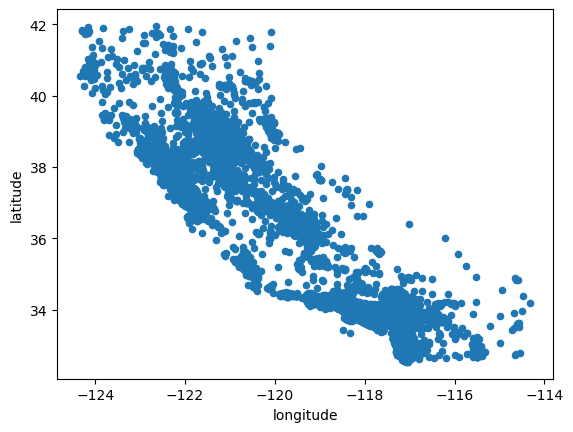

In [18]:
housing.plot(kind="scatter" ,x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

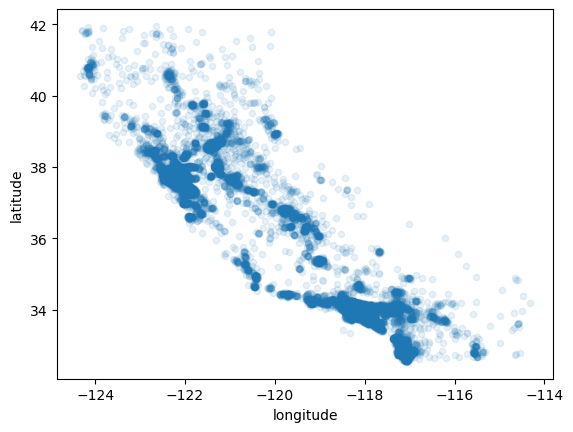

In [19]:
housing.plot(kind="scatter" ,x='longitude', y='latitude',alpha=0.1)

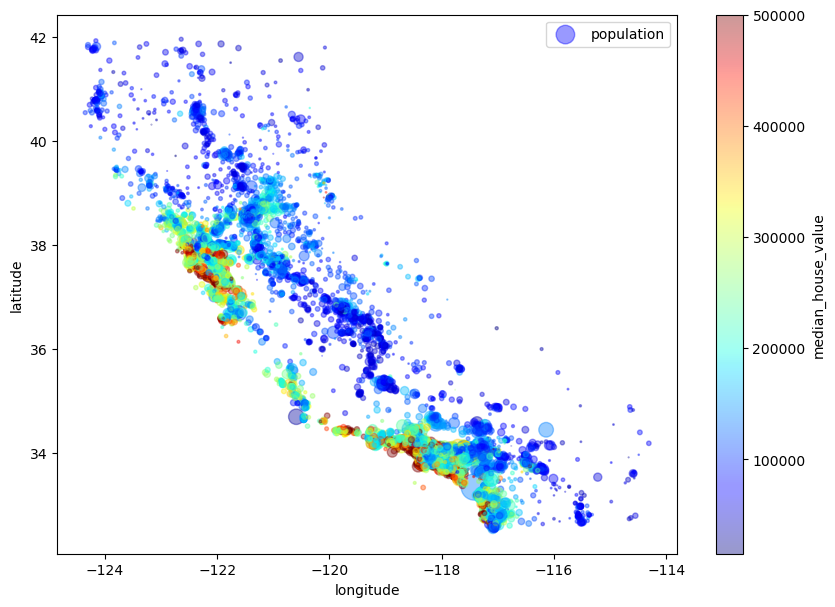

In [20]:
#let us plot the entire data according to the population and housing price
housing.plot(kind="scatter" , x="longitude", y="latitude",s=housing["population"]/100 ,alpha=0.4,
             c="median_house_value", cmap=plt.get_cmap('jet'),colorbar=True,label="population",
            figsize=(10,7))
plt.legend()

## Looking at the correlation 

In [21]:
corr_val=housing.corr()

In [22]:
#this represents how much does the other attribute help for finding the median house value.
#which is known as correlation of the dataset.

corr_val['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

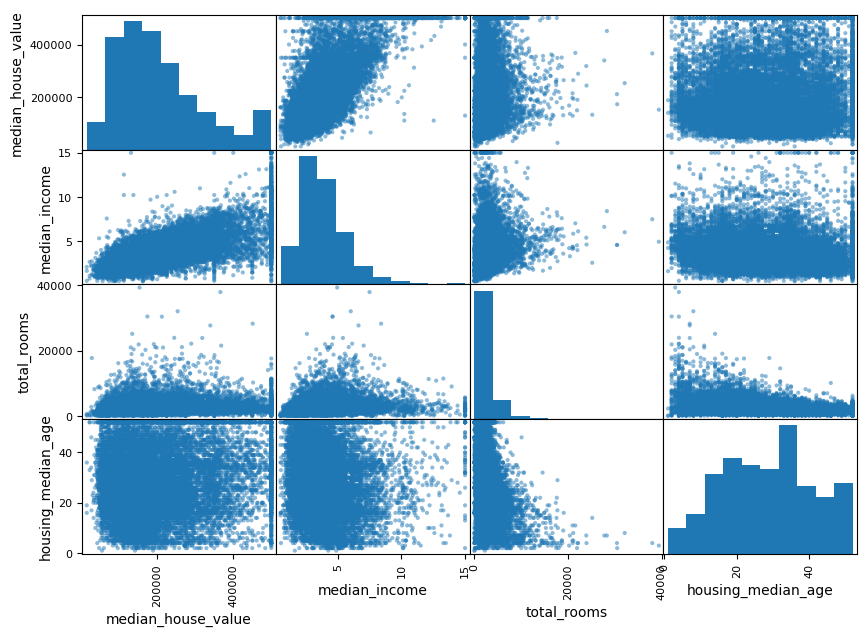

In [23]:
from pandas.plotting import scatter_matrix

attributes=['median_house_value','median_income','total_rooms','housing_median_age']

scatter_matrix(housing[attributes],figsize=(10,7));

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

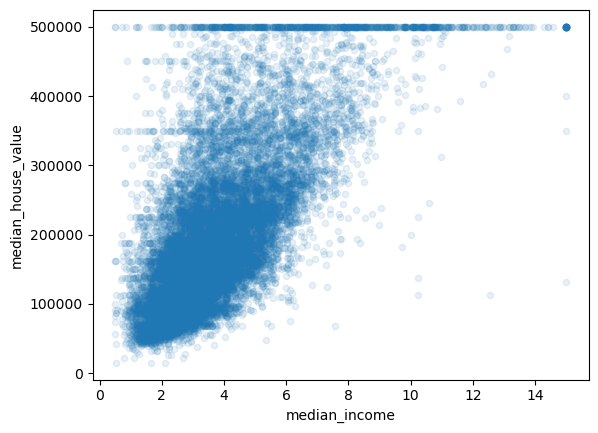

In [24]:
#hence the median income is directly oriented with the median_housing_value
housing.plot(kind='scatter',y='median_house_value',x='median_income',alpha=0.1)

**The above scatter plot shows a very high correlation among them so medain income is one of the main attributes in this dataframe**

# Create new Features.

- 1.rooms per household.
- 2.bedrooms per room.
- 3.population_per household.

In [25]:
housing['rooms_per_households']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_households']=housing['population']/housing['households']

In [26]:
corr_val=housing.corr()

corr_val['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687151
rooms_per_households         0.146255
total_rooms                  0.135140
housing_median_age           0.114146
households                   0.064590
total_bedrooms               0.047781
population_per_households   -0.021991
population                  -0.026882
longitude                   -0.047466
latitude                    -0.142673
bedrooms_per_room           -0.259952
Name: median_house_value, dtype: float64

In [27]:
housing=strat_train_set.drop("median_house_value",axis=1)

housing_label=strat_train_set['median_house_value'].copy()

# Data Cleaning

In [28]:
# The total bedroom has some missing values so fix it.
median=housing['total_bedrooms'].median()

housing['total_bedrooms'].fillna(median,inplace=True)

In [29]:
housing.isna().sum()

longitude                      0
latitude                       0
housing_median_age             0
total_rooms                    0
total_bedrooms                 0
population                     0
households                     0
median_income                  0
ocean_proximity                0
rooms_per_households           0
bedrooms_per_room            158
population_per_households      0
dtype: int64

In [30]:
#there is an another way to do this with the scikit learn methoda.
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median")

#hence this works only on the numerical attribute lets remove the catagorical attrbute
housing_num=housing.drop("ocean_proximity",axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [31]:
X=imputer.transform(housing_num)

In [32]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [33]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [34]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_per_room,population_per_households
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,6.297405,0.183835,2.411178


# Handling Text and Catagorical attribute

In [35]:
#let us create the series of the catagorical attribute 
housing_cat=housing[["ocean_proximity"]]


from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()

housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

**now we need to know about the difference between the ordinal encoder and One hot encoder.the one hot encoder uses only 0's and 1's whereas ordinal uses the numerals.which will not be helpful when there more than a kind of catagory it may be baised so we use onehot because it represents the position using 1 and other's as 0's ndarray.**

In [36]:
from sklearn.preprocessing import OneHotEncoder

housing_cat=housing[['ocean_proximity']]

onehot=OneHotEncoder()

housing_cat_onehot=onehot.fit_transform(housing_cat)

housing_cat_onehot[:10]

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

# Pipeline for Everything:


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
                          ('imputer',SimpleImputer(strategy='median')),
                          ('std_scaler',StandardScaler()),
                      ])

In [38]:
from sklearn.compose import ColumnTransformer

num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

full_pipeline=ColumnTransformer([
                       ("num",num_pipeline,num_attribs),
                       ("cat",OneHotEncoder(),cat_attribs)
                       ])

In [39]:
housing_prepared=full_pipeline.fit_transform(housing)

In [40]:
num_attribs=list(housing_num)

num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_households',
 'bedrooms_per_room',
 'population_per_households']

In [41]:
housing_prepared[1]

array([ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
        0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.91166333,
       -0.04081077,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ])

In [42]:
#let us build a machine learning model as of now the data is ready to use
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()

lin_reg.fit(housing_prepared,housing_label)

LinearRegression()

In [43]:
housing_preds=lin_reg.predict(housing_prepared)

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

lin_mae=mean_absolute_error(housing_label,housing_preds)

lin_mae

49058.88337935067

In [45]:
lin_mse=mean_squared_error(housing_label,housing_preds)

lin_mse

4645911608.916934

In [46]:
lin_rmse=np.sqrt(lin_mse)

lin_rmse

68160.92435491859

In [47]:
#so we need to shift for other models like decison tree and Randomforest

from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()

tree_reg.fit(housing_prepared,housing_label)

DecisionTreeRegressor()

In [48]:
dec_housing_pred=tree_reg.predict(housing_prepared)

In [49]:
# Function used to evaluate the model
from sklearn.metrics import mean_absolute_error,mean_squared_error

def evaluation(housing_label,housing_preds):
    
    '''This evaluation function returns the mean_absolute_error,mean_squared_error and 
       root_mean_squared_error.
    '''
    errors={
        "mae":mean_absolute_error(housing_label,housing_preds),
        "mse":mean_squared_error(housing_label,housing_preds),
        "rmse":np.sqrt(mean_squared_error(housing_label,housing_preds))
    
    }
    
    return errors
    

In [50]:
metrics=evaluation(housing_label,dec_housing_pred)

In [51]:
metrics

{'mae': 0.0, 'mse': 0.0, 'rmse': 0.0}

# overfitting

In [52]:
#for this we need to use the cross_validation
from sklearn.model_selection import cross_val_score

scores=cross_val_score(tree_reg,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=10)

rmse=np.sqrt(-scores)

rmse

array([73086.8244009 , 68926.32823098, 67633.77208102, 71938.7935201 ,
       68998.97351859, 75526.43523423, 71456.91790655, 72519.60437745,
       67510.1315315 , 70643.64793024])

# RandomForest

**The Random Forest is also known as the war horse of machine learning which in tern produce the best result.**

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor()

rf_model.fit(housing_prepared,housing_label)

RandomForestRegressor()

In [54]:
rf_preds=rf_model.predict(housing_prepared)

In [55]:
rf_scores=evaluation(housing_label,rf_preds)

In [56]:
rf_scores

{'mae': 12066.031196099808,
 'mse': 349871941.74041635,
 'rmse': 18704.86411980628}

**This machine learning model learnt some patterns rather than other algorithms so we do choose this algorithm and fine tune to get the better results**

**This fine tuning will be shown in the next chapter of the notebook.**

In [57]:
# let us just create a breakpoint and save our baseline model
import joblib

joblib.dump(rf_model,"Baseline_model.pkl")

['Baseline_model.pkl']

In [58]:
# this is a later action.
joblib.load("Baseline_model.pkl")

RandomForestRegressor()

In [59]:
# fine tuning our model
from sklearn.model_selection import GridSearchCV

param_grid=[
            {'n_estimators':[3,10,30],"max_features":[2,4,8]},
            {"bootstrap":[False],"n_estimators":[3,10],"max_features": [2,3,4]},
           ]

In [60]:
forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error",
                        return_train_score=True,verbose=True)

grid_search.fit(housing_prepared,housing_label)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [61]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [62]:
y_preds=grid_search.predict(housing_prepared)

scores=evaluation(housing_label,y_preds)

scores


{'mae': 12285.848231589147,
 'mse': 365243387.64620876,
 'rmse': 19111.341858859854}

In [66]:
# let us tune the model with randomized search cv
from sklearn.model_selection import RandomizedSearchCV

rs_param_grid=[{'n_estimators':[10,20,30,100],'max_features':[2,4,5,6],'max_leaf_nodes':[1,2,3,4],
               }]

model=RandomForestRegressor()

rs_model=RandomizedSearchCV(model,rs_param_grid,cv=5,scoring='neg_mean_squared_error',
                            return_train_score=True,verbose=True)

In [67]:
rs_model.fit(housing_prepared,housing_label)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/yashwanth/Desktop/sample_project_1/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/yashwanth/Desktop/sample_project_1/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/yashwanth/Desktop/sample_project_1/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/home/yashwanth/Desktop/sample_project_1/env/lib/python3.10/site-packages/joblib/parallel

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 5, 6],
                                         'max_leaf_nodes': [1, 2, 3, 4],
                                         'n_estimators': [10, 20, 30, 100]}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=True)

In [68]:
rs_model.best_params_

{'n_estimators': 100, 'max_leaf_nodes': 4, 'max_features': 6}

In [69]:
y_preds=rs_model.predict(housing_prepared)

#call the evaluation function to evaluate the model.
scores=evaluation(housing_label,y_preds)

#display the scores
scores

{'mae': 60129.10413108392, 'mse': 6343462207.752908, 'rmse': 79645.85493139557}

In [71]:
score=rs_model.score(housing_prepared,housing_label)

abs(score*100)

634346220775.2908